In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical  

In [2]:
from keras.datasets import mnist

Getting the dataset ready

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

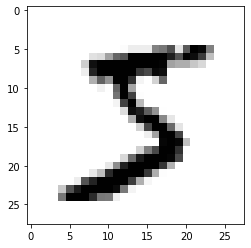

In [4]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [5]:
y_train[0]

5

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [7]:
# One hot encoding...
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [8]:
input_shape = (28, 28, 1)  # each of the training images is a pixel grid of size 28-by-28.

Building the layers of the Convolutional Neural Network

In [9]:
input_layer = Input(shape= input_shape)
layer1 = Conv2D(filters= 64, kernel_size= (3, 3), activation= 'relu')(input_layer)
layer2 = MaxPooling2D(pool_size= (3,3))(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(units= 250, activation= 'relu')(layer3)
layer5 = Dense(units= 10, activation= 'softmax')(layer4)

In [12]:
model = Model(input_layer, layer5)

In [13]:
from keras.losses import categorical_crossentropy

In [14]:
from keras.optimizers import SGD

Training the model on the training data over 10 epochs (using stochastic gradient descent algorithm as optimizer)

In [16]:
model.compile(optimizer= SGD(learning_rate= 0.01), loss= categorical_crossentropy, metrics= ['accuracy'])

In [17]:
History = model.fit(x_train_norm, y_train_encoded, verbose= 'auto', epochs= 10, validation_data= (x_test_norm, y_test_encoded))

Epoch 1/10
1875/1875 [==============================] - 68s 33ms/step - loss: 0.5496 - accuracy: 0.8500 - val_loss: 0.2711 - val_accuracy: 0.9171
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2447 - accuracy: 0.9262 - val_loss: 0.1878 - val_accuracy: 0.9467
Epoch 3/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1788 - accuracy: 0.9471 - val_loss: 0.1478 - val_accuracy: 0.9570
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1411 - accuracy: 0.9586 - val_loss: 0.1173 - val_accuracy: 0.9658
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1170 - accuracy: 0.9654 - val_loss: 0.1036 - val_accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0991 - accuracy: 0.9704 - val_loss: 0.0937 - val_accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0865 - accuracy: 0.9744 - val_loss: 0.0787 -

In [18]:
score = model.evaluate(x_test_norm, y_test_encoded)

313/313 [==============================] - 4s 12ms/step - loss: 0.0661 - accuracy: 0.9787


In [19]:
score

[0.06607793271541595, 0.9786999821662903]

In [20]:
print('The overall accuracy of the model is:', score[1]*100)  # in percentage
print('The overall loss of the model is:', score[0])

The overall accuracy of the model is: 97.86999821662903
The overall loss of the model is: 0.06607793271541595


In [21]:
# This means that our model is 97.8% accurate in making predictions

In [22]:
# Time for some predicitons! 
predictions = model.predict(x_test_norm)

313/313 [==============================] - 4s 12ms/step


In [23]:
predictions

array([[9.36640774e-08, 3.67649022e-08, 6.19132916e-05, ...,
        9.99920607e-01, 6.88981814e-08, 1.12911994e-06],
       [6.57634882e-06, 2.37108979e-04, 9.99638438e-01, ...,
        1.23906307e-09, 4.52731729e-06, 1.59320446e-10],
       [4.07822336e-05, 9.97374654e-01, 4.18485171e-04, ...,
        1.84634619e-03, 1.25907769e-04, 2.59193416e-06],
       ...,
       [1.10367274e-07, 1.89643679e-09, 1.08891403e-08, ...,
        1.78373492e-04, 2.55704686e-06, 4.48926185e-05],
       [1.97330382e-06, 2.48733329e-07, 1.26849656e-07, ...,
        7.02755827e-08, 3.35099059e-04, 5.39898906e-07],
       [5.47207264e-06, 3.17056174e-06, 1.34733578e-04, ...,
        1.36404266e-09, 3.88274248e-06, 8.66688232e-09]], dtype=float32)

In [24]:
predictions.shape

(10000, 10)

In [25]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Some Visualizations

In [27]:
epochs = list(range(1, 11))
training_accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']

training_loss = History.history['loss']
validation_loss = History.history['val_loss']

print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


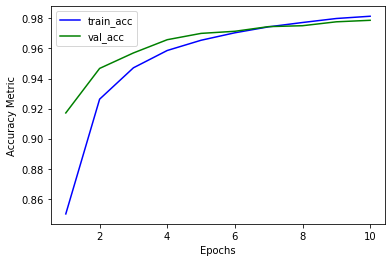

In [28]:
plt.plot(epochs, training_accuracy, 'b', label= 'train_acc')
plt.plot(epochs, validation_accuracy, 'g', label= 'val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Metric')
plt.legend()
plt.show()

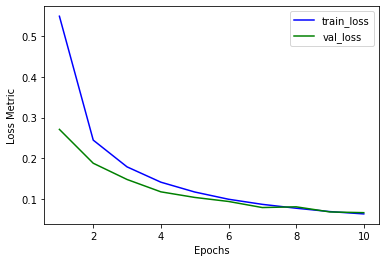

In [29]:
plt.plot(epochs, training_loss, 'b', label= 'train_loss')
plt.plot(epochs, validation_loss, 'g', label= 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Metric')
plt.legend()
plt.show()

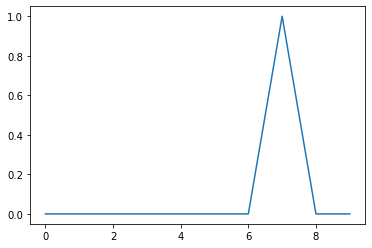

In [30]:
plt.plot(predictions[0])

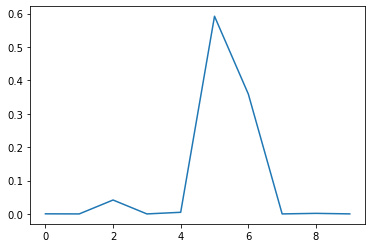

In [31]:
plt.plot(predictions[8])

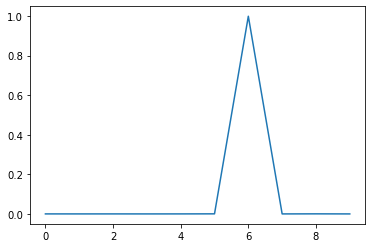

In [32]:
plt.plot(predictions[100])

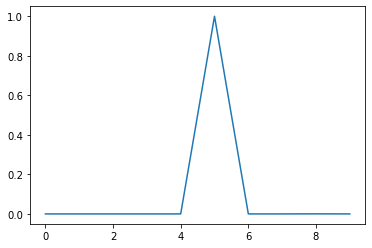

In [34]:
plt.plot(predictions[9998])

Looking at our preditions

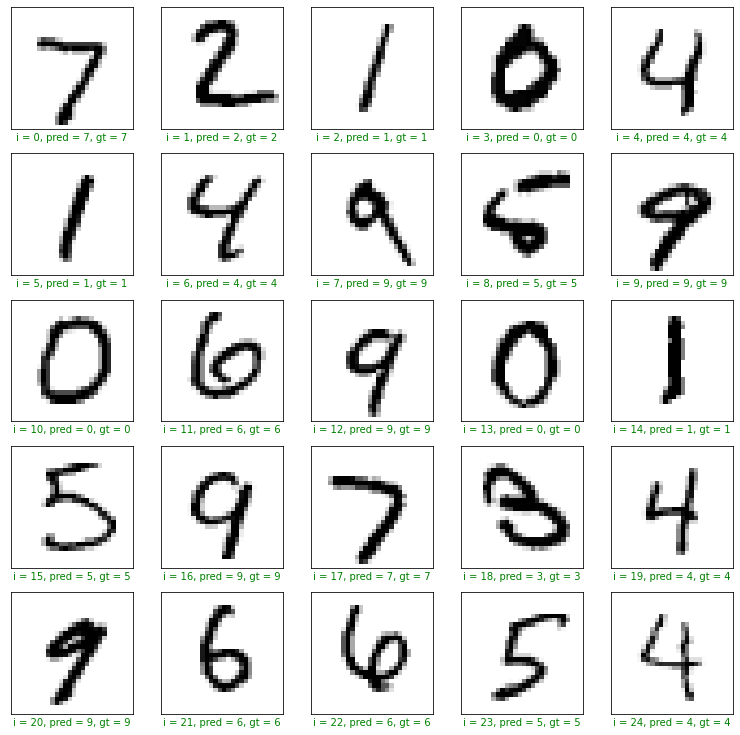

In [35]:
plt.figure(figsize= (13, 13))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(predictions[start_index + i])
    gt = y_test[start_index + i]

    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

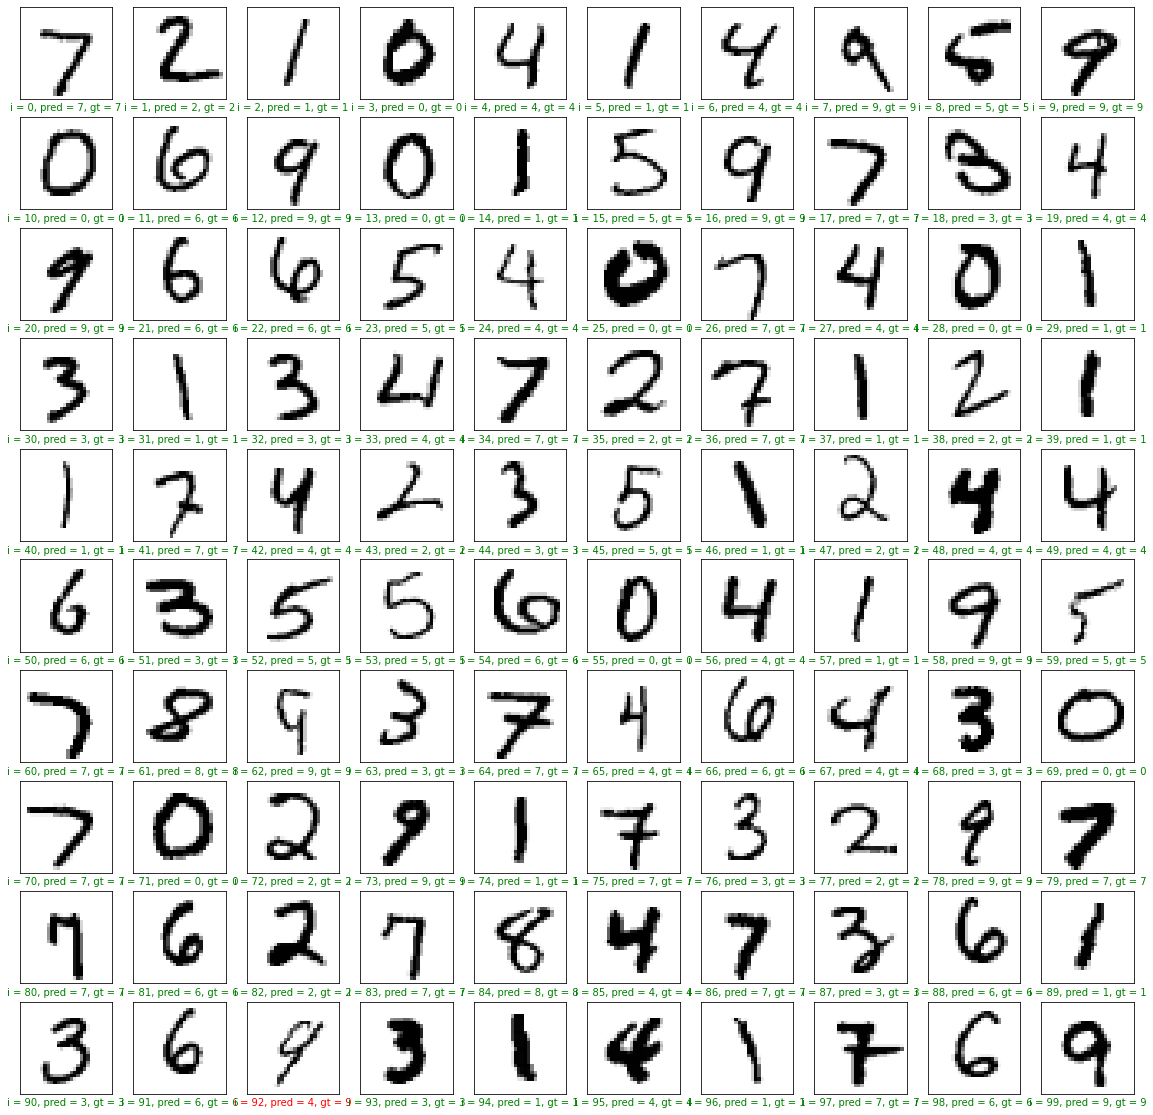

In [40]:
# Test - 2
plt.figure(figsize= (20, 20))
start_index = 0
for i in range(100):
    plt.subplot(10, 10, 1+i)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(predictions[start_index + i])
    gt = y_test[start_index + i]

    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

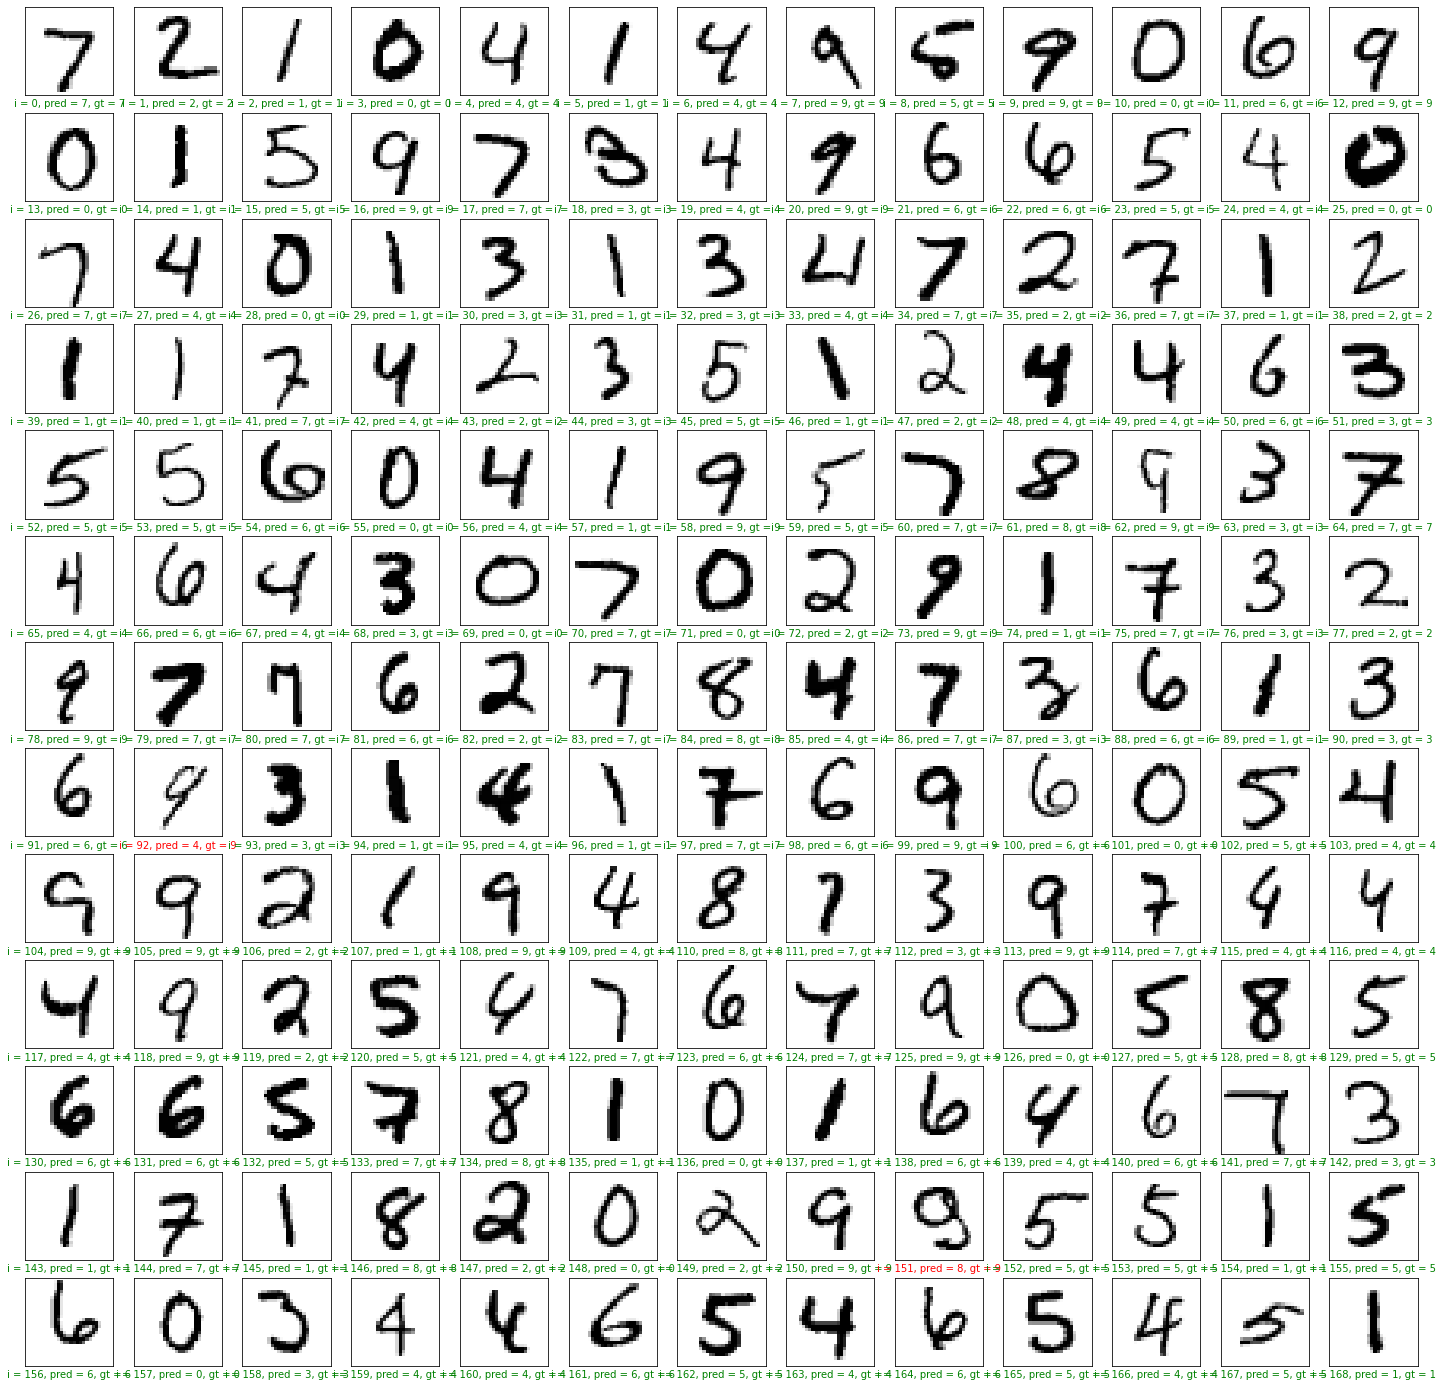

In [38]:
# Test - 3
plt.figure(figsize= (25, 25))
start_index = 0
for i in range(169):
    plt.subplot(13, 13, 1+i)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(predictions[start_index + i])
    gt = y_test[start_index + i]

    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

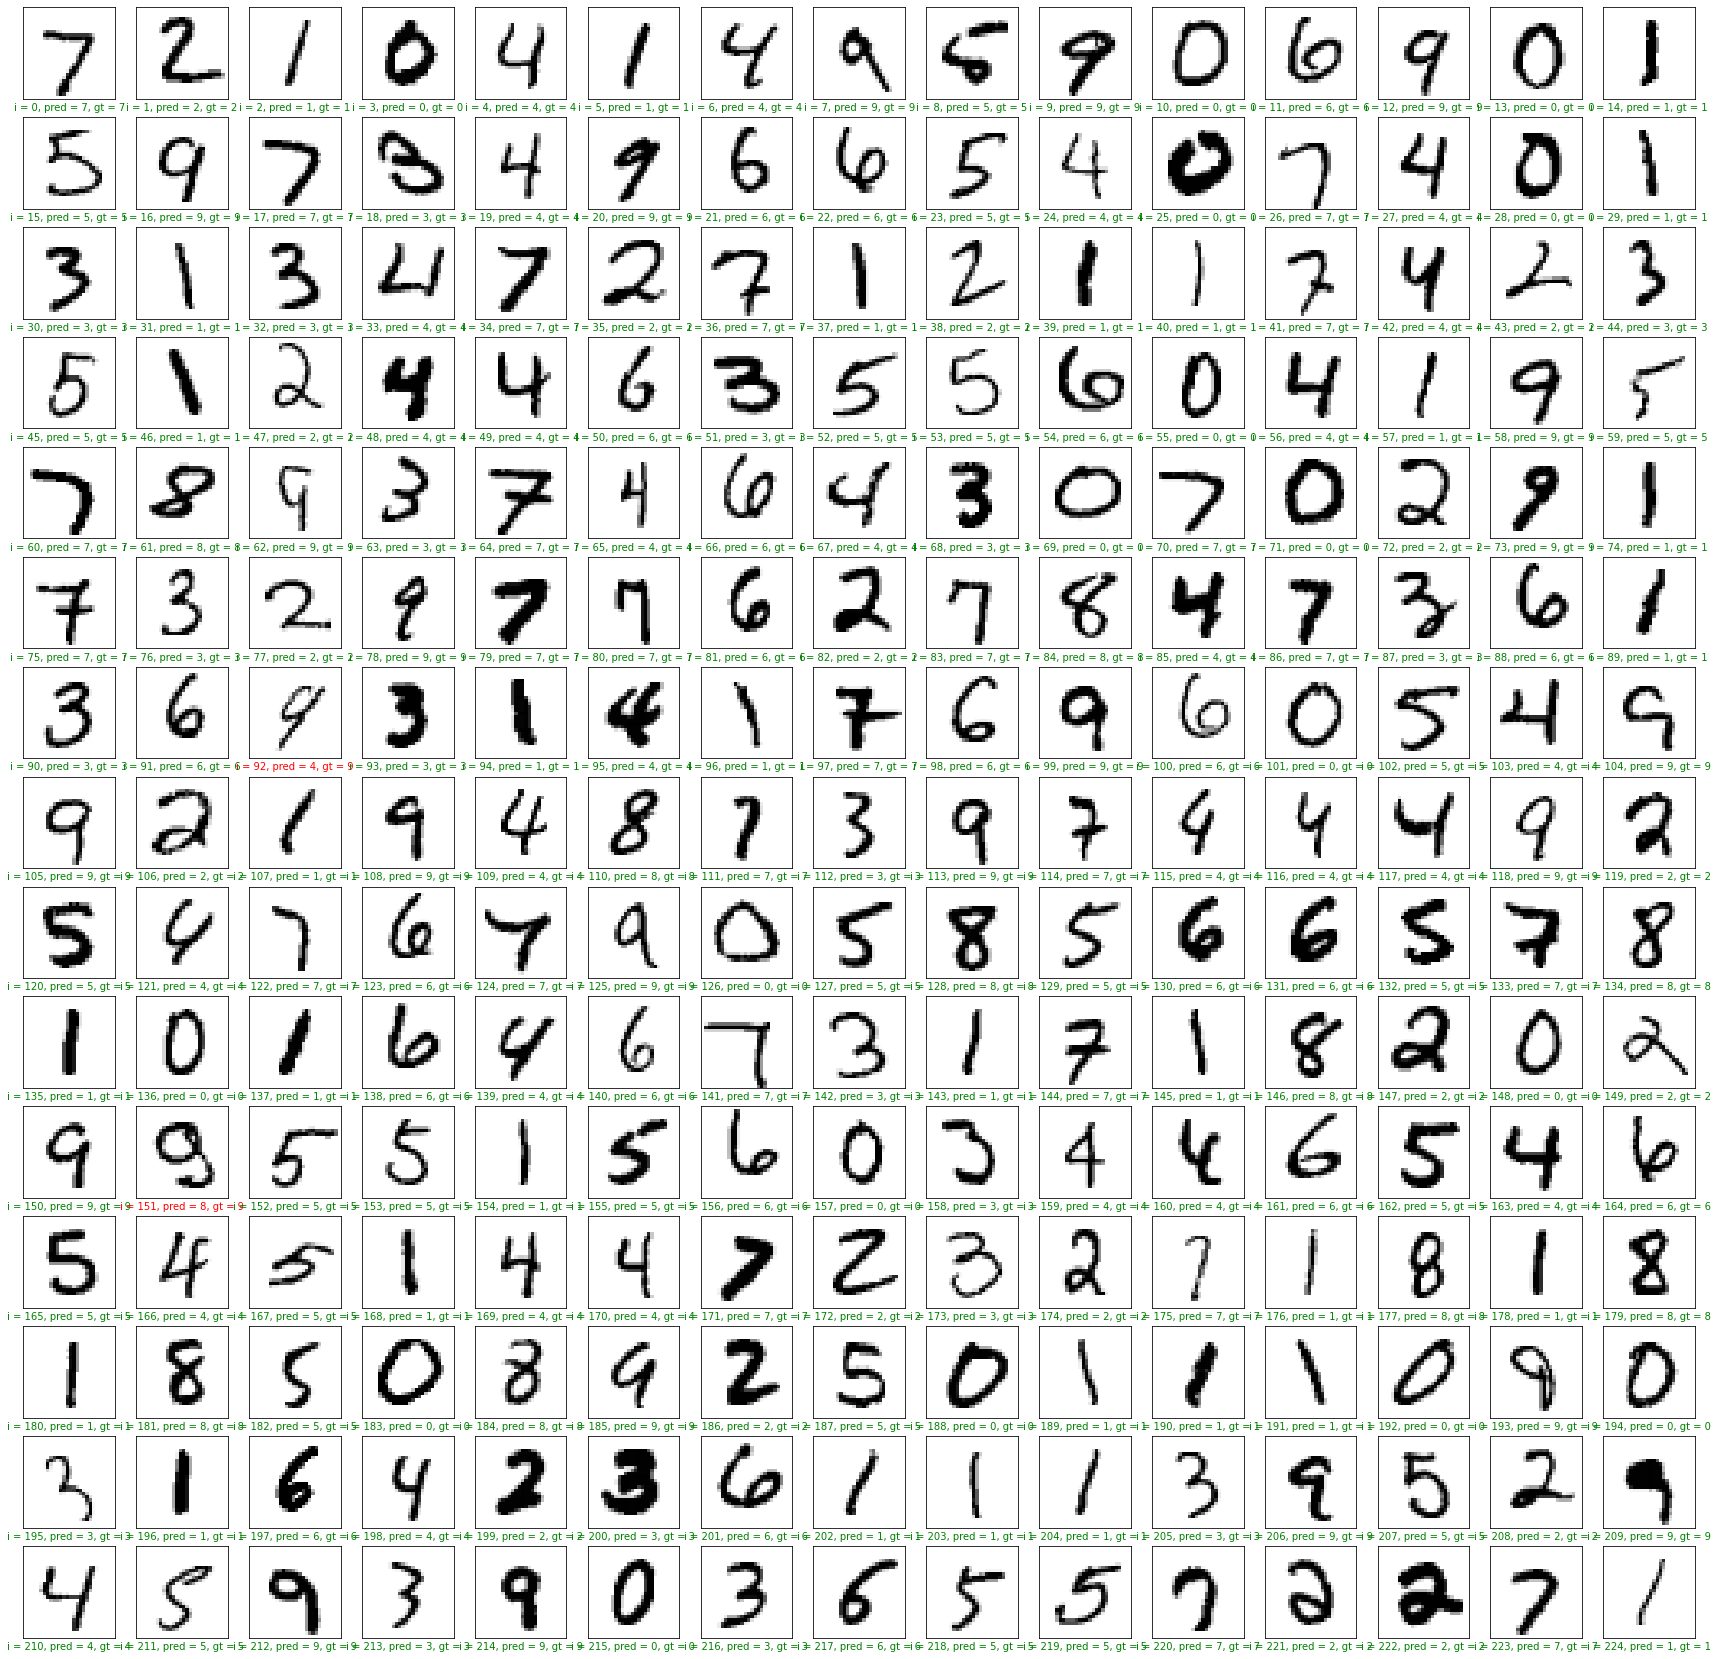

In [41]:
# Test - 4
plt.figure(figsize= (30, 30))
start_index = 0
for i in range(225):
    plt.subplot(15, 15, 1+i)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(predictions[start_index + i])
    gt = y_test[start_index + i]

    col = 'g'
    if pred != gt:
        col = 'r'
    plt.xlabel(f'i = {i}, pred = {pred}, gt = {gt}', color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

In [42]:
# Looks like our model's predictions are pretty accurate in the test data...

Confusion Matrix

In [43]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
Confusion_Matrix = confusion_matrix(y_true= y_test, y_pred= np.argmax(predictions, axis= 1))

In [45]:
Confusion_Matrix

array([[ 973,    0,    1,    0,    1,    1,    1,    1,    2,    0],
       [   0, 1126,    3,    0,    0,    1,    2,    2,    1,    0],
       [   2,    1, 1016,    1,    1,    0,    0,    5,    6,    0],
       [   0,    0,    7,  976,    0,   14,    0,    5,    5,    3],
       [   0,    0,    3,    0,  974,    0,    0,    0,    1,    4],
       [   4,    0,    0,    1,    0,  883,    3,    0,    0,    1],
       [   6,    3,    3,    0,    6,   12,  924,    1,    3,    0],
       [   1,    2,   13,    1,    0,    0,    0, 1001,    2,    8],
       [   4,    0,    8,    3,    3,    5,    1,    4,  943,    3],
       [   2,    3,    4,    1,   14,    7,    0,    6,    1,  971]],
      dtype=int64)

In [46]:
Confusion_Matrix.shape

(10, 10)

In [47]:
Classification_Report = classification_report(y_true= y_test, y_pred= np.argmax(predictions, axis=1))

In [48]:
Classification_Report

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.96      0.98      0.97      1032\n           3       0.99      0.97      0.98      1010\n           4       0.97      0.99      0.98       982\n           5       0.96      0.99      0.97       892\n           6       0.99      0.96      0.98       958\n           7       0.98      0.97      0.98      1028\n           8       0.98      0.97      0.97       974\n           9       0.98      0.96      0.97      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

In [49]:
type(Classification_Report)

str